## Przygotowanie


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

keras = tf.keras

In [93]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)


#Występowanie
Szeregi czasowe występują dosłownie w każdej dziedzinie życia. Ich zastosowanie można łatwo dostrzec m.in w prognozach pogody, na giełdzie, w historycznych danych, pomiarach.

#Szereg czasowy
Szeregiem czasowym nazywamy uporządkowaną sekwencję, w której dane ułożone są sekwencyjnie, a kluczem określającym ich położenie jest czas.
W zależności od wartości określanych przez encjęw danym punkcie w czasie, dane możemy podzielić na:
- jednowymiarowe (jedna wartość w jednym punkcie)
- wielowymiarowe (wiele wartości w jednym punkcie)

#Przykładowy zbiór danych jednowymiarowych.
Zbiór szeregów przedstawiających ilość sprzedanych szamponów na przestrzeni 3 lat

In [224]:
url = "https://raw.githubusercontent.com/Mervolt/TimeSeriesTutorial/master/shampoo.csv"

shampoo_dataset = pd.read_csv(url, error_bad_lines=False)
print(shampoo_dataset)

   Month  Sales
0   1-01  266.0
1   1-02  145.9
2   1-03  183.1
3   1-04  119.3
4   1-05  180.3
5   1-06  168.5
6   1-07  231.8
7   1-08  224.5
8   1-09  192.8
9   1-10  122.9
10  1-11  336.5
11  1-12  185.9
12  2-01  194.3
13  2-02  149.5
14  2-03  210.1
15  2-04  273.3
16  2-05  191.4
17  2-06  287.0
18  2-07  226.0
19  2-08  303.6
20  2-09  289.9
21  2-10  421.6
22  2-11  264.5
23  2-12  342.3
24  3-01  339.7
25  3-02  440.4
26  3-03  315.9
27  3-04  439.3
28  3-05  401.3
29  3-06  437.4
30  3-07  575.5
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9


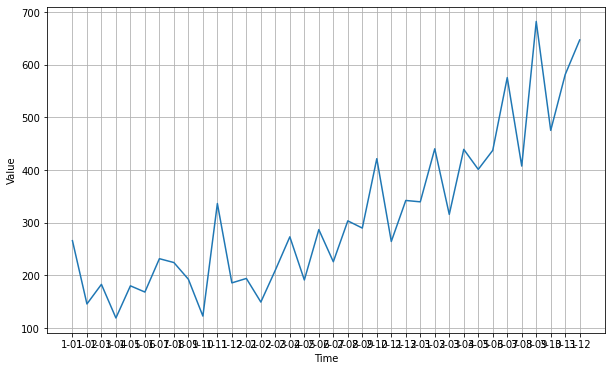

In [225]:
time, values = shampoo_dataset["Month"], shampoo_dataset["Sales"]

plt.figure(figsize=(10, 6))
plot_series(time, values, label = False)
plt.show()

#Przykładowy zbiór danych wielowymiarowych
Zbiór szeregów przedstawiających obserwacje ilości ozonu przez 6 lat


            Time  "1"    2    3    4    5  ...     68     69     70   71    72   73
0       1/1/1998  0.8  1.8  2.4  2.1    2  ...  -12.1   17.9  10330  -55     0  0.0
1       1/2/1998  2.8  3.2  3.3  2.7  3.3  ...  14.05     29  10275  -55     0  0.0
2       1/3/1998  2.9  2.8  2.6  2.1  2.2  ...   17.9   41.3  10235  -40     0  0.0
3       1/4/1998  4.7  3.8  3.7  3.8  2.9  ...  31.15   51.7  10195  -40  2.08  0.0
4       1/5/1998  2.6  2.1  1.6  1.4  0.9  ...      ?      ?      ?    ?  0.58  0.0
...          ...  ...  ...  ...  ...  ...  ...    ...    ...    ...  ...   ...  ...
2529  12/27/2004  0.3  0.4  0.5  0.5  0.2  ...  -25.6   21.8  10295   65     0  0.0
2530  12/28/2004    1  1.4  1.1  1.7  1.5  ...  -19.4   19.1  10310   15     0  0.0
2531  12/29/2004  0.8  0.8  1.2  0.9  0.4  ...   -9.6   35.2  10275  -35     0  0.0
2532  12/30/2004  1.3  0.9  1.5  1.2  1.6  ...  -19.6   34.2  10245  -30  0.05  0.0
2533  12/31/2004  1.5  1.3  1.8  1.4  1.2  ...   1.95  39.35  10220  -25    

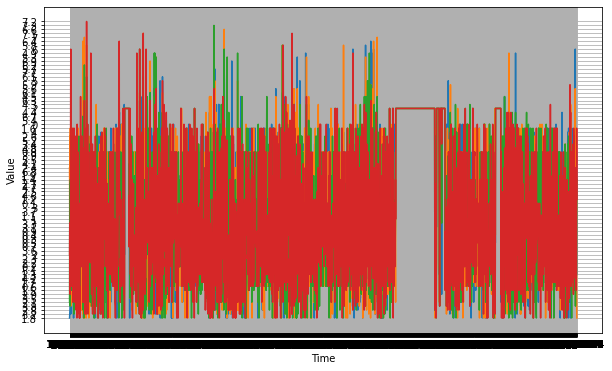

In [230]:
url = "https://raw.githubusercontent.com/Mervolt/TimeSeriesTutorial/master/ozone.csv"

ozone_dataset = pd.read_csv(url)
print(ozone_dataset)

time, values = ozone_dataset["Time"], ozone_dataset[ozone_dataset.columns[2:6]]

plt.figure(figsize=(10, 6))
plot_series(time, values["2"], label = False)
plot_series(time, values["3"], label = False)
plot_series(time, values["4"], label = False)
plot_series(time, values["5"], label = False)
plt.show()

#Wspólne cechy szeregów

Wiele szeregów czasowych posiada takie właściwości jak:
- trend (np. monotoniczny wzrost lub spadek)
- sezonowość, którą można zaobserwować jako okres na wykresie (np. ilość turystów w zależności od miesiąca pokazywać będzie największe wartości w okresie letnim)
- szum, czyli zakłócenia, drobne błędy wartości występujące w zbiorze danych

#Trend rosnący

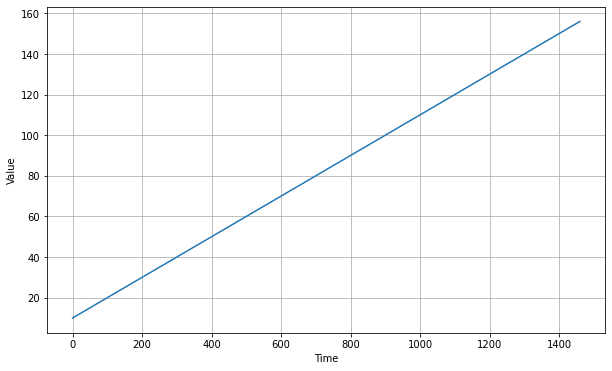

In [41]:
def trend(time, slope=0):
    return slope * time

time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

#Sezonowość

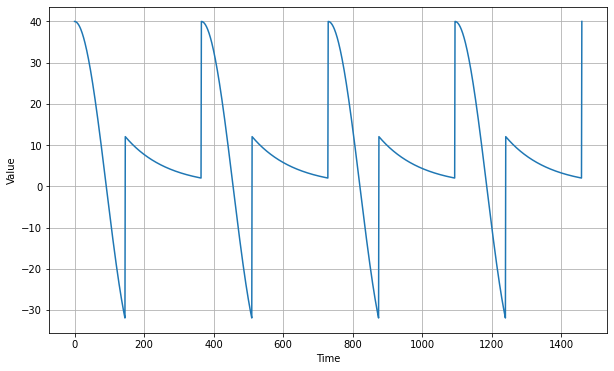

In [42]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

#Szum

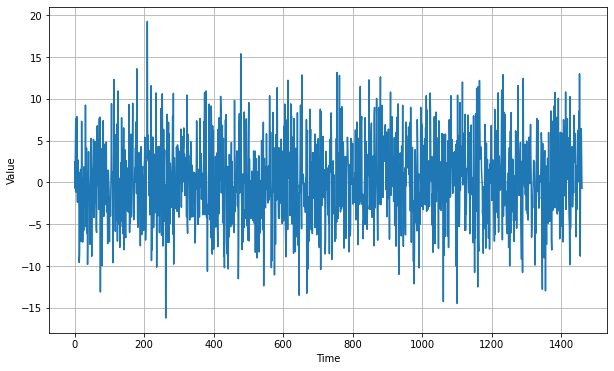

In [43]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

#Przewidywanie

Posiadając zbiór przedstawiający szereg czasowy pewnych wartości możemy zabrać się za próby oszacowania wartości jakie wystąpią w przyszłości.

Użyjemy zbioru przedstawiającego minimalne temperature w Melbourne w latach 1981-1990.

Zbiór podzielimy zgodnie z metodą "Fixed partitioning na część do uczenia, walidacyjną i testującą.

#Naiwne przewidywanie

Najprostszym możliwym sposobem jest po prostu branie poprzedniej wartości jako przewidywaną. Metoda wydaje się być prymitywna, ale osiągane przez nią rezultaty są warte zaobserwowania chociażby dla celów porównania z innymi metodami.



In [231]:
url = "https://raw.githubusercontent.com/Mervolt/TimeSeriesTutorial/master/melbourne_min_temp.csv"

dataset = pd.read_csv(url)
print(dataset)

            Date  Temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]


In [47]:
split = 3000
time, values = dataset["Date"], dataset["Temp"]
x_train, y_train = time[:split], values[:split]
x_valid, y_valid = time[split:], values[split:] 

In [48]:
naive_forecast = values[split - 1:-1]

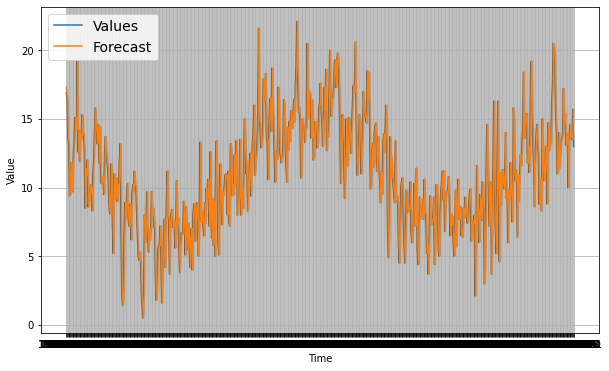

In [50]:
plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid, label="Values")
plot_series(x_valid, naive_forecast, label="Forecast")

Wykresy nachodzą na siebie w takim stopniu, że nie można ich od siebie odróżnić. Wydzielimy teraz dla celów demonstracyjnych podzbiór.

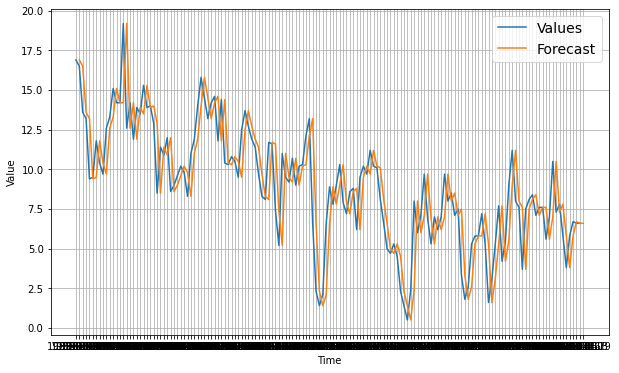

In [53]:
plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid, start=0, end=150, label="Values")
plot_series(x_valid, naive_forecast, start=1, end=151, label="Forecast")

Możemy zaobserwować, że przewidywania są po prostu 1 krok za rzeczywistymi wartościami.

W celu ewaluacji potrzebujemy metryk. Użyjemy w tym przypadku metryk średniokwadratowej oraz odległości w przestrzeni Euklidesowej.

In [95]:
print(keras.metrics.mean_absolute_error(y_valid, naive_forecast).numpy())
print(keras.metrics.mean_squared_error(y_valid, naive_forecast).numpy())

1.9816923076923083
6.355738461538462


#Ruchoma średnia
Podejściem, które teraz zostanie zaprezentowane to ruchoma średnia. Jest ono relatywnie proste i polega na wyciąganiu średniej z okresu o długości n. To "ruchome okno" o długości n przesuwamy po całym zbiorze danych.
Przykładowo dla okna o długości, wartość pola o indeksie 7 liczymy jako średnią z pól o indeksach 5, 6 i 7, a dla pola o indeksie 22 z pól o indeksach 20, 21 i 22.

Zalety:
- redukuje szum

Wady:
- nie uwzględnia sezonowości
- nie uwzględnia trendów

In [101]:
def moving_average_forecast(values, window_size):
  forecast = []
  for time in range(len(values) - window_size):
    forecast.append(values[time:time + window_size].mean())
  return np.array(forecast)

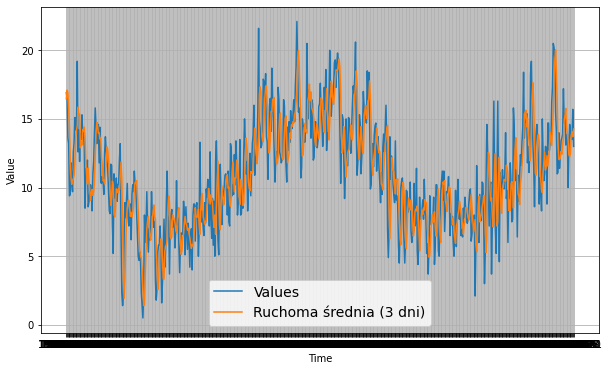

In [104]:
moving_avg = moving_average_forecast(values, 3)[split - 3:]

plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid, label="Values")
plot_series(x_valid, moving_avg, label="Ruchoma średnia (3 dni)")

In [105]:
print(keras.metrics.mean_absolute_error(y_valid, moving_avg).numpy())
print(keras.metrics.mean_squared_error(y_valid, moving_avg).numpy())

2.072205128205128
7.014871794871795


Szok! Osiągneliśmy gorsze wyniki niż w przypadku naiwnego podejścia. Może długość aplikowanego okna była za mała?
Spróbujmy dla innej wielkości okna.

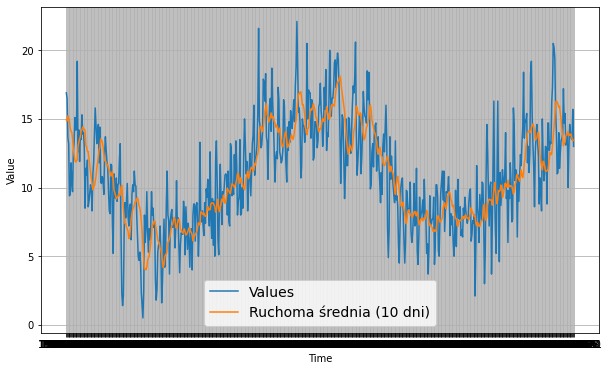

In [106]:
moving_avg = moving_average_forecast(values, 10)[split - 10:]

plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid, label="Values")
plot_series(x_valid, moving_avg, label="Ruchoma średnia (10 dni)")

In [107]:
print(keras.metrics.mean_absolute_error(y_valid, moving_avg).numpy())
print(keras.metrics.mean_squared_error(y_valid, moving_avg).numpy())

2.018692307692308
6.685355538461537


Wciąż gorsze wyniki. Powodem jest tutaj potężna wada tego podejścia, a mianowicie brak uwzględnienia sezonowości, która w przypadku temperatur jest oczywista i bardzo wyraźna

#Ulepszona metoda ruchomej średniej
Aby ulepszyć metodę ruchomej średniej należy zlikwidować jej wady - brak uwzględniania trendów oraz brak uwzględniania sezonowości.
W tym celu należy specjalnie zadaptować nasz zbiór danych. Zamiast korzystać po prostu z naszego zbioru, korzystać będziemy z różnic (wartość - wartość wcześniejsza o pewien czas t, np. 1 rok i różnica = czerwiec 1984 - czerwiec 1983 )

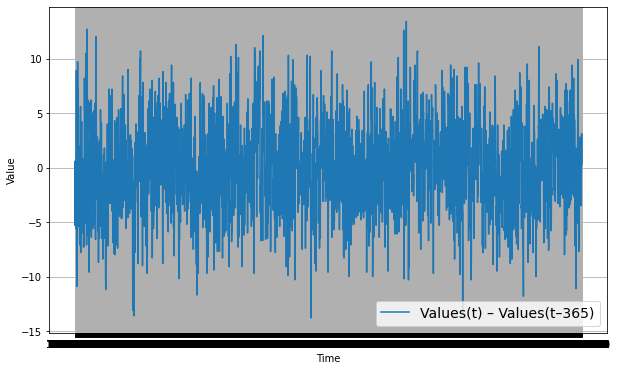

In [167]:
diff_values = (values[365:].reset_index() - values[:-365].reset_index())['Temp']
diff_time = time[365:]
plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_values, label="Values(t) – Values(t–365)")
plt.show()

Podzbiór walidacyjny

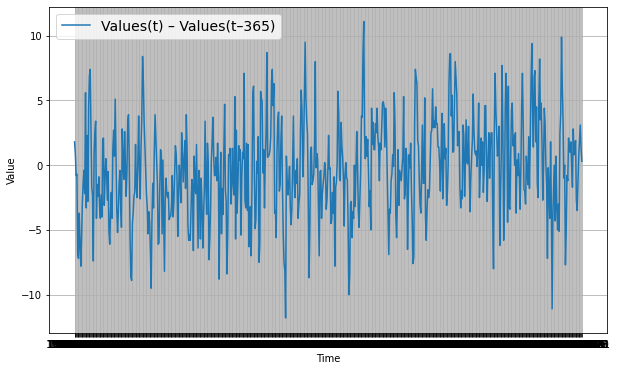

In [168]:
plt.figure(figsize=(10, 6))
plot_series(x_valid, diff_values[split - 365:], label="Values(t) – Values(t–365)")
plt.show()

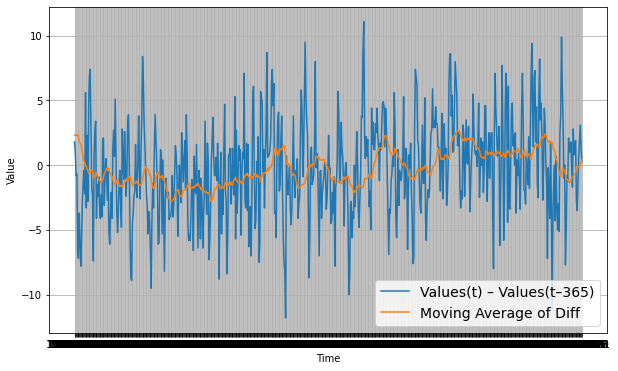

In [169]:
diff_moving_avg = moving_average_forecast(diff_values, 30)[split - 365 - 30:]

plt.figure(figsize=(10, 6))
plot_series(x_valid, diff_values[split - 365:], label="Values(t) – Values(t–365)")
plot_series(x_valid, diff_moving_avg, label="Moving Average of Diff")
plt.show()

W porządku. Obliczyliśmy ruchomą średnią, ale nie jest to przecież nasz zbiór danych, a to on jest dla nas interesujący. W takim razie musimy go odzyskać.
Aby to zrobić należy dodać wartości z przeszłości.

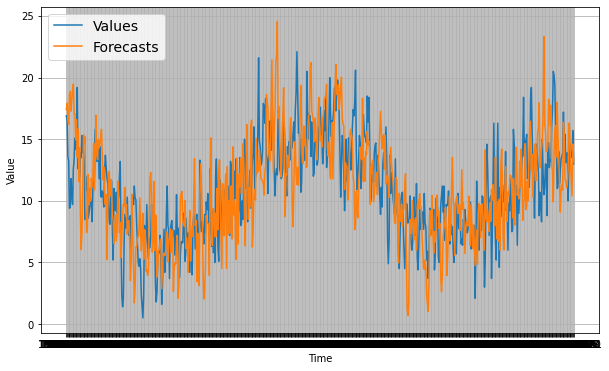

In [170]:
diff_moving_avg_plus_past = values[split - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid, label="Values")
plot_series(x_valid, diff_moving_avg_plus_past, label="Forecasts")
plt.show()

In [171]:
print(keras.metrics.mean_absolute_error(y_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_squared_error(y_valid, diff_moving_avg_plus_past).numpy())

2.9022871794871796
13.794366256410257


Otrzymaliśmy tragiczne wyniki. Spróbujmy zredukować szum w początkowych danych.

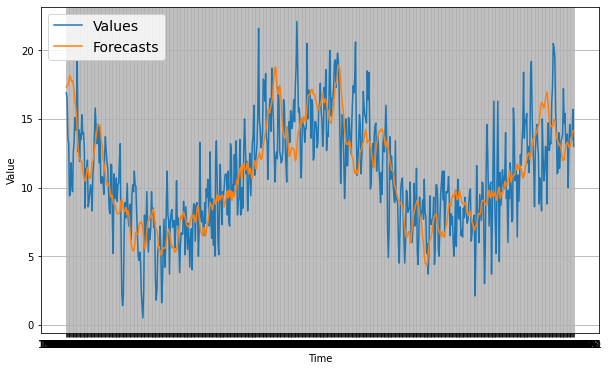

In [172]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(values[split - 370:-359], 11) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid, label="Values")
plot_series(x_valid, diff_moving_avg_plus_smooth_past, label="Forecasts")
plt.show()

In [174]:
print(keras.metrics.mean_absolute_error(y_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_squared_error(y_valid, diff_moving_avg_plus_smooth_past).numpy())

2.197555244755245
8.117508752701845


Znacznie lepiej, jednakże wciąż otrzymaliśmy gorsze rezultaty niż w przypadku naiwnego przewidywania

#Przewidywanie - Machine Learning
Użyjemy sieci o warstwie 1 bez żadnej funkcji aktywacji. Użyjemy metody regresji.

In [205]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(y_train, window_size)
valid_set = window_dataset(y_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae", "mse"])
model.fit(train_set, epochs=100, validation_data=valid_set)

Epoch 1/100
93/93 [==============================] - 1s 7ms/step - loss: 16.3570 - mae: 16.8539 - mse: 368.4968 - val_loss: 3.2128 - val_mae: 3.6826 - val_mse: 21.4497
Epoch 2/100
93/93 [==============================] - 1s 7ms/step - loss: 3.5196 - mae: 3.9934 - mse: 24.4266 - val_loss: 3.1437 - val_mae: 3.6189 - val_mse: 20.5600
Epoch 3/100
93/93 [==============================] - 1s 7ms/step - loss: 3.4741 - mae: 3.9461 - mse: 24.0395 - val_loss: 3.1043 - val_mae: 3.5795 - val_mse: 20.0941
Epoch 4/100
93/93 [==============================] - 1s 6ms/step - loss: 3.4286 - mae: 3.9021 - mse: 23.4942 - val_loss: 3.0599 - val_mae: 3.5347 - val_mse: 19.5889
Epoch 5/100
93/93 [==============================] - 1s 7ms/step - loss: 3.3108 - mae: 3.7806 - mse: 22.5446 - val_loss: 3.0161 - val_mae: 3.4877 - val_mse: 19.1123
Epoch 6/100
93/93 [==============================] - 1s 7ms/step - loss: 3.3441 - mae: 3.8145 - mse: 22.8065 - val_loss: 2.9749 - val_mae: 3.4476 - val_mse: 18.6413
Epoch 7

Sukces! Udało nam się przebić naiwne przewidywanie na danych testowych.

In [206]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(y_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 30))
optimizer = keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
93/93 [==============================] - 1s 5ms/step - loss: 17.7808 - mae: 18.2803
Epoch 2/100
93/93 [==============================] - 1s 5ms/step - loss: 14.4808 - mae: 14.9803
Epoch 3/100
93/93 [==============================] - 1s 5ms/step - loss: 10.7377 - mae: 11.2352
Epoch 4/100
93/93 [==============================] - 1s 5ms/step - loss: 7.2022 - mae: 7.6926
Epoch 5/100
93/93 [==============================] - 1s 5ms/step - loss: 4.6217 - mae: 5.1030
Epoch 6/100
93/93 [==============================] - 1s 5ms/step - loss: 3.4558 - mae: 3.9318
Epoch 7/100
93/93 [==============================] - 1s 5ms/step - loss: 3.1512 - mae: 3.6208
Epoch 8/100
93/93 [==============================] - 1s 5ms/step - loss: 3.1122 - mae: 3.5811
Epoch 9/100
93/93 [==============================] - 1s 5ms/step - loss: 3.0635 - mae: 3.5332
Epoch 10/100
93/93 [==============================] - 1s 5ms/step - loss: 3.0585 - mae: 3.5271
Epoch 11/100
93/93 [==============================] -

(1e-06, 0.001, 0.0, 20.0)

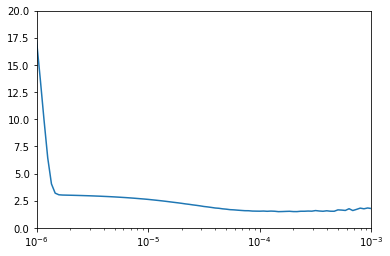

In [207]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-3, 0, 20])

In [209]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(y_train, window_size)
valid_set = window_dataset(y_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae", "mse"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
93/93 [==============================] - 1s 8ms/step - loss: 16.3570 - mae: 16.8539 - mse: 368.4968 - val_loss: 3.2128 - val_mae: 3.6826 - val_mse: 21.4497
Epoch 2/500
93/93 [==============================] - 1s 7ms/step - loss: 3.5196 - mae: 3.9934 - mse: 24.4266 - val_loss: 3.1437 - val_mae: 3.6189 - val_mse: 20.5600
Epoch 3/500
93/93 [==============================] - 1s 7ms/step - loss: 3.4741 - mae: 3.9461 - mse: 24.0395 - val_loss: 3.1043 - val_mae: 3.5795 - val_mse: 20.0941
Epoch 4/500
93/93 [==============================] - 1s 7ms/step - loss: 3.4286 - mae: 3.9021 - mse: 23.4942 - val_loss: 3.0599 - val_mae: 3.5347 - val_mse: 19.5889
Epoch 5/500
93/93 [==============================] - 1s 8ms/step - loss: 3.3108 - mae: 3.7806 - mse: 22.5446 - val_loss: 3.0161 - val_mae: 3.4877 - val_mse: 19.1123
Epoch 6/500
93/93 [==============================] - 1s 6ms/step - loss: 3.3441 - mae: 3.8145 - mse: 22.8065 - val_loss: 2.9749 - val_mae: 3.4476 - val_mse: 18.6413
Epoch 7

In [210]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [211]:
lin_forecast = model_forecast(model, values[split - window_size:-1], window_size)[:, 0]
lin_forecast.shape

(650,)

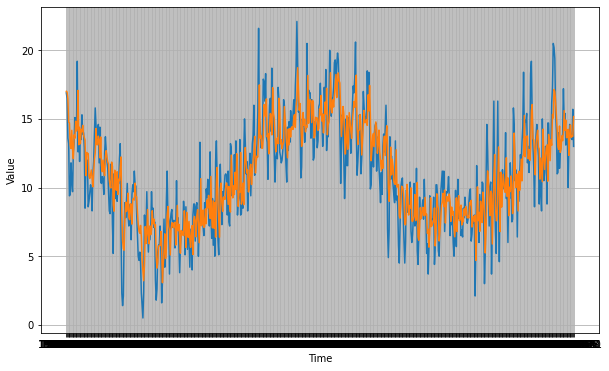

In [212]:
plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid)
plot_series(x_valid, lin_forecast)

In [213]:
print(keras.metrics.mean_absolute_error(y_valid, lin_forecast).numpy())
print(keras.metrics.mean_squared_error(y_valid, lin_forecast).numpy())

1.7567815
5.0595436


Rezultat z dość znaczną poprawą :)

Dwuwarstwowy model z funkcją aktywacji relu.

In [214]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(y_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae", "mse"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
93/93 [==============================] - 1s 5ms/step - loss: 10.6114 - mae: 11.1107 - mse: 144.3384
Epoch 2/100
93/93 [==============================] - 1s 5ms/step - loss: 10.3364 - mae: 10.8351 - mse: 137.3170
Epoch 3/100
93/93 [==============================] - 1s 4ms/step - loss: 9.8207 - mae: 10.3193 - mse: 125.4601
Epoch 4/100
93/93 [==============================] - 1s 5ms/step - loss: 9.2227 - mae: 9.7199 - mse: 112.3094
Epoch 5/100
93/93 [==============================] - 1s 5ms/step - loss: 8.6285 - mae: 9.1245 - mse: 100.0291
Epoch 6/100
93/93 [==============================] - 1s 4ms/step - loss: 7.8452 - mae: 8.3410 - mse: 84.3817
Epoch 7/100
93/93 [==============================] - 1s 5ms/step - loss: 7.0618 - mae: 7.5561 - mse: 71.6049
Epoch 8/100
93/93 [==============================] - 1s 4ms/step - loss: 6.0919 - mae: 6.5834 - mse: 55.8909
Epoch 9/100
93/93 [==============================] - 1s 5ms/step - loss: 5.1617 - mae: 5.6507 - mse: 42.3775
Epoch 10/

(1e-07, 0.005, 0.0, 30.0)

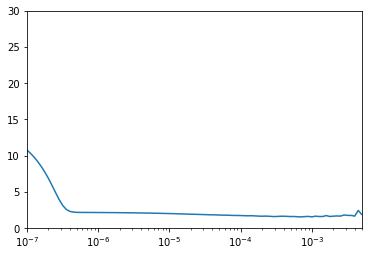

In [215]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 5e-3, 0, 30])

In [217]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(y_train, window_size)
valid_set = window_dataset(y_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae", "mse"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
93/93 [==============================] - 1s 8ms/step - loss: 6.3174 - mae: 6.8044 - mse: 65.1123 - val_loss: 1.9494 - val_mae: 2.4123 - val_mse: 9.5514
Epoch 2/500
93/93 [==============================] - 1s 7ms/step - loss: 2.1684 - mae: 2.6272 - mse: 10.8546 - val_loss: 1.8993 - val_mae: 2.3587 - val_mse: 9.1745
Epoch 3/500
93/93 [==============================] - 1s 7ms/step - loss: 2.1198 - mae: 2.5773 - mse: 10.6027 - val_loss: 1.8677 - val_mae: 2.3244 - val_mse: 8.9448
Epoch 4/500
93/93 [==============================] - 1s 7ms/step - loss: 2.1810 - mae: 2.6392 - mse: 11.0276 - val_loss: 1.8456 - val_mae: 2.3026 - val_mse: 8.7784
Epoch 5/500
93/93 [==============================] - 1s 7ms/step - loss: 2.0970 - mae: 2.5544 - mse: 10.3275 - val_loss: 1.8247 - val_mae: 2.2805 - val_mse: 8.6291
Epoch 6/500
93/93 [==============================] - 1s 7ms/step - loss: 2.0720 - mae: 2.5286 - mse: 10.1829 - val_loss: 1.8128 - val_mae: 2.2710 - val_mse: 8.5281
Epoch 7/500
93/9

In [218]:
dense_forecast = model_forecast(
    model,
    values[split - window_size:-1],
    window_size)[:, 0]

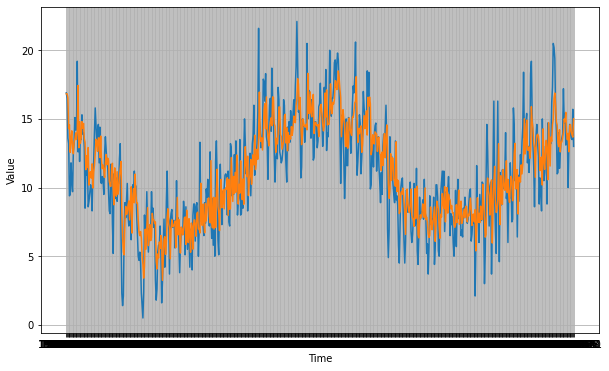

In [219]:
plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid)
plot_series(x_valid, dense_forecast)

In [220]:
print(keras.metrics.mean_absolute_error(y_valid, dense_forecast).numpy())
print(keras.metrics.mean_squared_error(y_valid, dense_forecast).numpy())

1.8001333
5.4022727


#RNN

In [194]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(y_train, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae", "mse"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
24/24 [==============================] - 3s 41ms/step - loss: 40.3799 - mae: 40.8766 - mse: 2520.5411
Epoch 2/100
24/24 [==============================] - 1s 41ms/step - loss: 29.8692 - mae: 30.3646 - mse: 1445.4554
Epoch 3/100
24/24 [==============================] - 1s 41ms/step - loss: 20.5248 - mae: 21.0185 - mse: 736.0491
Epoch 4/100
24/24 [==============================] - 1s 41ms/step - loss: 15.3686 - mae: 15.8627 - mse: 468.4097
Epoch 5/100
24/24 [==============================] - 1s 40ms/step - loss: 12.6860 - mae: 13.1760 - mse: 329.2771
Epoch 6/100
24/24 [==============================] - 1s 43ms/step - loss: 11.0894 - mae: 11.5792 - mse: 260.9613
Epoch 7/100
24/24 [==============================] - 1s 39ms/step - loss: 10.0154 - mae: 10.5028 - mse: 213.5802
Epoch 8/100
24/24 [==============================] - 1s 39ms/step - loss: 9.1062 - mae: 9.5924 - mse: 195.4186
Epoch 9/100
24/24 [==============================] - 1s 40ms/step - loss: 8.2198 - mae: 8.7031 -

(1e-07, 0.0001, 0.0, 30.0)

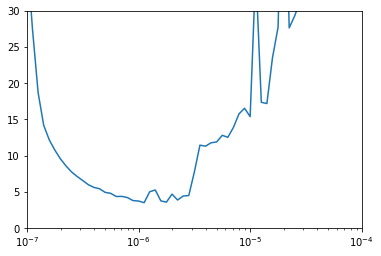

In [195]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 1e-4, 0, 30])

In [197]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(y_train, window_size, batch_size=128)
valid_set = window_dataset(y_valid, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=1.5e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
24/24 [==============================] - 3s 75ms/step - loss: 69.7315 - mae: 70.2300 - val_loss: 23.2952 - val_mae: 23.7943
INFO:tensorflow:Assets written to: my_checkpoint/assets
Epoch 2/500
24/24 [==============================] - 1s 47ms/step - loss: 16.0890 - mae: 16.5825 - val_loss: 6.7983 - val_mae: 7.2829
INFO:tensorflow:Assets written to: my_checkpoint/assets
Epoch 3/500
24/24 [==============================] - 1s 47ms/step - loss: 6.8056 - mae: 7.2874 - val_loss: 3.8749 - val_mae: 4.3456
INFO:tensorflow:Assets written to: my_checkpoint/assets
Epoch 4/500
24/24 [==============================] - 1s 47ms/step - loss: 5.0401 - mae: 5.5134 - val_loss: 5.2615 - val_mae: 5.7457
Epoch 5/500
24/24 [==============================] - 1s 48ms/step - loss: 5.2766 - mae: 5.7561 - val_loss: 3.8273 - val_mae: 4.2980
INFO:tensorflow:Assets written to: my_checkpoint/assets
Epoch 6/500
24/24 [==============================] - 1s 49ms/step - loss: 3.9476 - mae: 4.4202 - val_loss: 3.1

In [201]:
rnn_forecast = model_forecast(
    model,
    values[split - window_size:-1],
    window_size)[:, 0]

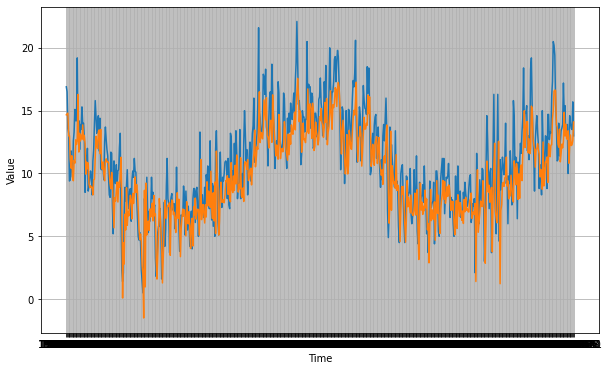

In [202]:
plt.figure(figsize=(10, 6))
plot_series(x_valid, y_valid)
plot_series(x_valid, rnn_forecast)

In [204]:
print(keras.metrics.mean_absolute_error(y_valid, rnn_forecast).numpy())
print(keras.metrics.mean_squared_error(y_valid, rnn_forecast).numpy())

1.9716848
6.1017785
